In [95]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import os
import glob

from datetime import date, datetime, timedelta, time

TO DO
- Associate the latitudes with the GIC monitors and visualize
- Calculate and attach magnetic coordinates to the GIC sensor measurements
- Include the magnetometers from NERC in addition to GIC sensors
- Align these sensors with solar wind and geomagnetic activity index data
- ...

In [99]:
event_no = 8

In [100]:
# Utility Functions

def nerc_string_time_reader(df,columnLabel):
    '''
        df = dataframe with NERC data readings
        columnLabel = column label for the time strings  
    '''
    
    dt_list = [datetime.strptime(val, '%m/%d/%Y %I:%M:%S %p') for val in df[columnLabel].values]
    
    return dt_list


def nerc_gic_data_reshaping(df):
    '''
        df must have the following columns:
            GICDeviceID
            SampleDateTime
            GICMeasured
    '''
    list_times = nerc_string_time_reader(df,'SampleDateTime')
#     list_times
    
    df_times = pd.Series(list_times,name='datetimes')
    df_new = pd.concat([df,df_times],axis=1)
    df_new = df_new.set_index('datetimes')
    colName = str(df_new['GICDeviceID'].values[0])
    df_new = df_new.rename(columns={"GICMeasured": colName})
    df_new = df_new.drop(columns=['GICDeviceID','SampleDateTime'])

    
    return df_new

In [101]:
!pwd

/Users/erika/Documents/PSI/projects/jackeddy/risk-resiliency-spwx


In [102]:
event_list = np.loadtxt('event_list.txt', str)

files_dir_gic = 'data/'+event_list[event_no,3]+'/GIC/'

print(files_dir_gic) 

data/event_20170907/GIC/


In [103]:
# Read in the GIC location files

# GICs
pd_gic_locations = pd.read_csv(os.path.join(files_dir_gic,'gic_monitors.csv'))
print('number of GIC monitors = {}'.format(len(pd_gic_locations)))



number of GIC monitors = 169


In [104]:
pd_gic_locations.columns.to_list()#['Latitude']

['Device ID',
 ' Latitude',
 ' Longitude',
 ' Installation Type',
 ' Connection',
 ' Minimum Value in Measurement Range']

In [105]:
# Plot GIC locations

import plotly.express as px


fig = px.scatter_geo(pd_gic_locations,lat=' Latitude',lon=360.-pd_gic_locations[' Longitude'], hover_name="Device ID")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

In [106]:
# Create a dataframe of datetimes spanning the event and that will be used as the common index for all time series

format = '%Y-%m-%dT%H:%M'

event_start = datetime.strptime(event_list[event_no,1], format)
event_end = datetime.strptime(event_list[event_no,2], format)
df_event_dates = pd.date_range(event_start,event_end,freq='10s')

df_event_dates = df_event_dates.to_pydatetime()
df_event_dates = pd.DataFrame(df_event_dates,columns=['datetimes'])
# df_event_dates = df_event_dates.index.rename('Datetimes', inplace=True)
df_event_dates


,datetimes
0,2017-09-07 00:00:00
1,2017-09-07 00:00:10
2,2017-09-07 00:00:20
3,2017-09-07 00:00:30
4,2017-09-07 00:00:40
...,...
25916,2017-09-09 23:59:20
25917,2017-09-09 23:59:30
25918,2017-09-09 23:59:40
25919,2017-09-09 23:59:50


In [107]:
# loop over files in the directory for a given event and create merged DFs for GICs

df_total = df_event_dates

for f in glob.glob(os.path.join(files_dir_gic,'*csv')):#[0:10]:
    
    # Skip missing data files
    if ('missing' in f) | ('monitor' in f) | ('magnetometers' in f):
        print('-------> skipping file = {}'.format(f))
        continue
    print(f)
    
    # Read and reshape the data
    df_loop = pd.read_csv(f)
    
    df_loop = nerc_gic_data_reshaping(df_loop)
            
    # Merge into full dataframe
    df_total = pd.merge(df_total, df_loop, on='datetimes',how='left')

data/event_20170907/GIC/2017E02_10432.csv
data/event_20170907/GIC/2017E02_10397.csv
data/event_20170907/GIC/2017E02_10382.csv
data/event_20170907/GIC/2017E02_10433.csv
data/event_20170907/GIC/2017E02_10341.csv
data/event_20170907/GIC/2017E02_10427.csv
data/event_20170907/GIC/2017E02_10194.csv
data/event_20170907/GIC/2017E02_10237.csv
data/event_20170907/GIC/2017E02_10425.csv
data/event_20170907/GIC/2017E02_10343.csv
data/event_20170907/GIC/2017E02_10197.csv
data/event_20170907/GIC/2017E02_10420.csv
data/event_20170907/GIC/2017E02_10421.csv
data/event_20170907/GIC/2017E02_10435.csv
-------> skipping file = data/event_20170907/GIC/gic_monitors.csv
data/event_20170907/GIC/2017E02_10227.csv
data/event_20170907/GIC/2017E02_10184.csv
data/event_20170907/GIC/2017E02_10378.csv
data/event_20170907/GIC/2017E02_10344.csv
data/event_20170907/GIC/2017E02_10191.csv
data/event_20170907/GIC/2017E02_10257.csv
data/event_20170907/GIC/2017E02_10294.csv
data/event_20170907/GIC/2017E02_10083.csv
data/event

In [108]:
print(df_total)

                datetimes  10432  10397  10382  10433  10341  10427  10194  \
0     2017-09-07 00:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1     2017-09-07 00:00:10    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2     2017-09-07 00:00:20    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3     2017-09-07 00:00:30    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4     2017-09-07 00:00:40    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...                   ...    ...    ...    ...    ...    ...    ...    ...   
32934 2017-09-09 23:59:20    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
32935 2017-09-09 23:59:30    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
32936 2017-09-09 23:59:40    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
32937 2017-09-09 23:59:50    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
32938 2017-09-10 00:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       10237  10425  10343  10197  10420  10421  10435  10227  

In [109]:
df_total.iloc[1090]

datetimes    2017-09-07 03:01:40
10432                        NaN
10397                        NaN
10382                        NaN
10433                        NaN
                    ...         
10400                        NaN
10206                        NaN
10364                        NaN
10403                        NaN
10205                        NaN
Name: 1090, Length: 71, dtype: object

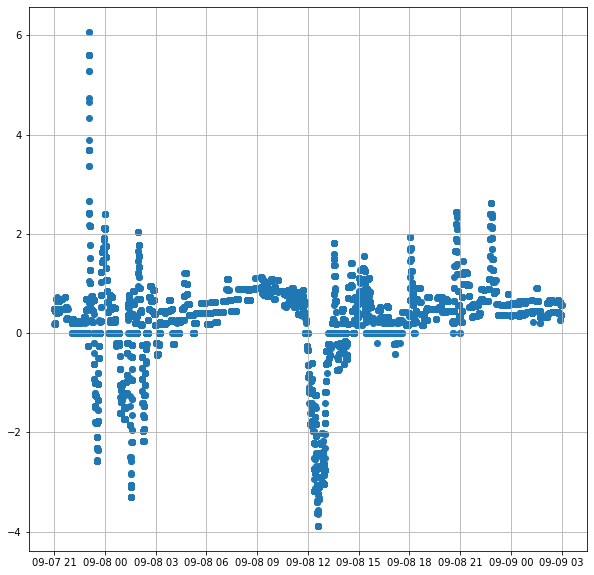

In [111]:
plot_ID = '10432'

fig = plt.figure(figsize=(10,10))
plt.scatter(df_total['datetimes'],
            df_total[plot_ID],
            alpha=1,
            label=plot_ID)

plt.grid(True)

In [112]:
!pip install geomagindices

In [113]:
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.timeseries import TimeSeries

In [114]:
sunpy_format = '%Y/%m/%d %H:%M'

trange = a.Time(event_start.strftime(sunpy_format), event_end.strftime(sunpy_format))
dataset = a.cdaweb.Dataset('OMNI_HRO2_5MIN')
result = Fido.search(trange, dataset)

In [115]:
print(result)

Results from 1 Provider:

1 Results from the CDAWEBClient:
Source: https://cdaweb.gsfc.nasa.gov/index.html

   Dataset            Start time               End time       
-------------- ----------------------- -----------------------
OMNI_HRO2_5MIN 2017-09-01 00:00:00.000 2017-09-30 23:55:00.000




In [116]:
downloaded_files = Fido.fetch(result[0])
print(downloaded_files)


['/Users/erika/sunpy/data/omni_hro2_5min_20170901_v01.cdf']


In [117]:
pd.set_option('display.max_columns', None)

imf_data = TimeSeries(downloaded_files, concatenate=True)
df_imf = imf_data.to_dataframe()
df_imf['datetimes'] = df_imf.index

print(df_imf.columns)

Index(['AE_INDEX', 'AL_INDEX', 'ASY_D', 'ASY_H', 'AU_INDEX', 'BSN_x', 'BSN_y',
       'BSN_z', 'BX_GSE', 'BY_GSE', 'BY_GSM', 'BZ_GSE', 'BZ_GSM', 'Beta',
       'Day', 'E', 'F', 'HR', 'IMF', 'IMF_PTS', 'Mach_num', 'Mgs_mach_num',
       'Minute', 'NaNp_Ratio', 'PLS', 'PLS_PTS', 'PR-FLX_10', 'PR-FLX_30',
       'PR-FLX_60', 'Pressure', 'RMS_SD_B', 'RMS_SD_fld_vec', 'RMS_Timeshift',
       'SYM_D', 'SYM_H', 'T', 'Time_btwn_obs', 'Timeshift', 'Vx', 'Vy', 'Vz',
       'YR', 'flow_speed', 'percent_interp', 'proton_density', 'x', 'y', 'z',
       'datetimes'],
      dtype='object')


In [118]:
# Filter out the filling values in the solar wind + geomag indices data

dict_mag = {9999.990234375: np.nan}
dict_vel = {99999.8984375: np.nan}
dict_den = {999.989990234375: np.nan}
dict_pre = {99.98999786376953: np.nan}
dict_ind = {99999: np.nan}

df_imf = df_imf.replace({'F': dict_mag})
df_imf = df_imf.replace({'BX_GSE': dict_mag})
df_imf = df_imf.replace({'BY_GSM': dict_mag})
df_imf = df_imf.replace({'BZ_GSM': dict_mag})
df_imf = df_imf.replace({'flow_speed': dict_vel})
df_imf = df_imf.replace({'proton_density': dict_den})
df_imf = df_imf.replace({'Pressure': dict_pre})
df_imf = df_imf.replace({'SYM_H': dict_ind})
df_imf = df_imf.replace({'AE_INDEX': dict_ind})
df_imf = df_imf.replace({'AL_INDEX': dict_ind})
df_imf = df_imf.replace({'AU_INDEX': dict_ind})

In [119]:
df_final = pd.merge(df_total,df_imf,on='datetimes',how='left')
print(df_final)

                datetimes  10432  10397  10382  10433  10341  10427  10194  \
0     2017-09-07 00:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1     2017-09-07 00:00:10    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2     2017-09-07 00:00:20    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3     2017-09-07 00:00:30    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4     2017-09-07 00:00:40    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...                   ...    ...    ...    ...    ...    ...    ...    ...   
32934 2017-09-09 23:59:20    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
32935 2017-09-09 23:59:30    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
32936 2017-09-09 23:59:40    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
32937 2017-09-09 23:59:50    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
32938 2017-09-10 00:00:00    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       10237  10425  10343  10197  10420  10421  10435  10227  

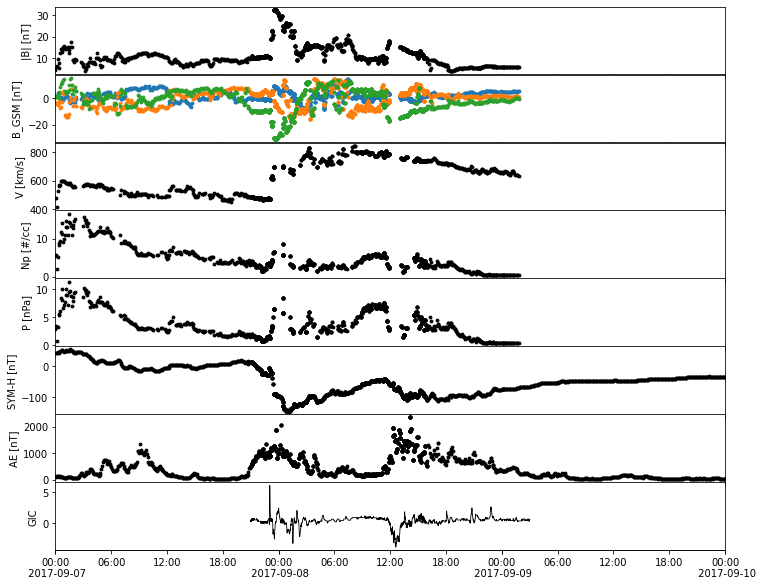

In [120]:
fig, axarr = plt.subplots(8, sharex=True)
plt.subplots_adjust(hspace = .001) 

axarr[0].set_xlim([event_start,event_end])

axarr[0].set_ylabel('|B| [nT]')
axarr[0].scatter(df_final['datetimes'], df_final['F'], color='black', s=8)

axarr[1].set_ylabel('B_GSM [nT]')
axarr[1].scatter(df_final['datetimes'], df_final['BX_GSE'], color='tab:blue', s=8)
axarr[1].scatter(df_final['datetimes'], df_final['BY_GSM'], color='tab:orange', s=8)
axarr[1].scatter(df_final['datetimes'], df_final['BZ_GSM'], color='tab:green', s=8)

axarr[2].set_ylabel('V [km/s]')
axarr[2].scatter(df_final['datetimes'], df_final['flow_speed'], color='black', s=8)

axarr[3].set_ylabel('Np [#/cc]')
axarr[3].scatter(df_final['datetimes'], df_final['proton_density'], color='black', s=8)

axarr[4].set_ylabel('P [nPa]')
axarr[4].scatter(df_final['datetimes'], df_final['Pressure'], color='black', s=8)

axarr[5].set_ylabel('SYM-H [nT]')
axarr[5].scatter(df_final['datetimes'], df_final['SYM_H'], color='black', s=8)

axarr[6].set_ylabel('AE [nT]')
axarr[6].scatter(df_final['datetimes'], df_final['AE_INDEX'], color='black', s=8)

axarr[7].set_ylabel('GIC')
axarr[7].plot(df_final['datetimes'], df_final[plot_ID], color='black', lw=0.8)

axarr[7].xaxis.set_major_locator(mdates.HourLocator([0,6,12,18]))
axarr[7].xaxis.set_major_formatter(mdates.DateFormatter('%H:00'))
axarr[7].tick_params(axis='x', which='major')

xaxis_copy = axarr[7].secondary_xaxis('bottom')
xaxis_copy.xaxis.set_major_locator(mdates.DayLocator(interval=1))
xaxis_copy.xaxis.set_major_formatter(mdates.DateFormatter('%n %Y-%m-%d'))
xaxis_copy.tick_params(axis='x', which='major')

fig.set_size_inches(12,10)
fig.patch.set_facecolor('white')

plt.show()